In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('./data/EuStockMarkets.csv', index_col= 'rownames')
df.head()

,DAX,SMI,CAC,FTSE
rownames,,,,
1,1628.75,1678.1,1772.8,2443.6
2,1613.63,1688.5,1750.5,2460.2
3,1606.51,1678.6,1718.0,2448.2
4,1621.04,1684.1,1708.1,2470.4
5,1618.16,1686.6,1723.1,2484.7


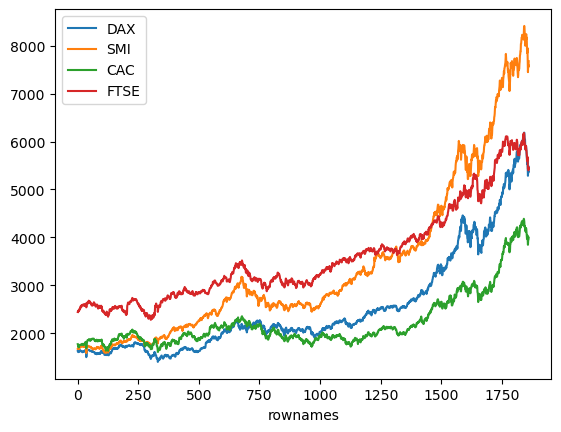

In [36]:
df.plot()
plt.show()


The time series plots depict the values of four different stock indices over time: DAX, SMI, CAC, and FTSE. None of the series appears to be stationary as each exhibits a clear upward trend, suggesting that the mean of the series is not constant over time. This trend is indicative of growth in the value of the indices, which is typical for stock indices over a long period.

The fluctuations in the series do not seem to be of constant size. Early in the series, the fluctuations are relatively small, but as time progresses, the fluctuations increase in magnitude. This is particularly evident in the latter part of the series, where swings in index values become more pronounced.

Volatility, which refers to the degree of variation of the series over time, appears to be changing. Initially, the volatility is lower, but it increases as the value of the indices grows. This pattern of 'volatility clustering', where large changes tend to be followed by large changes (of either sign), and small changes tend to be followed by small changes, is typical of financial time series data. Moreover, such non-constant volatility could suggest that the data exhibit heteroskedasticity, where the variance of the indices changes over time.

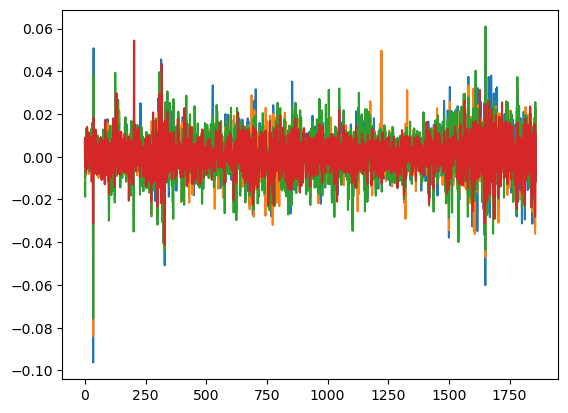

In [37]:
log_r = np.diff(np.log(df), axis=0)
plt.plot(log_r)
plt.show()

Unlike the levels of an index, returns can be negative or positive, reflecting the percentage change from one period to the next.

The plots appear more stationary than those in the previous image, with no evident trend over time and mean values that seem to hover around zero for all four series. This characteristic is more in line with financial returns data, which, after accounting for periodic returns, typically show a degree of stationarity.

In terms of constant fluctuation size, while the returns are centered around zero, there are periods with larger spikes, suggesting volatility clustering. This is a common feature in financial time series, where large changes tend to be followed by large changes and small changes by small changes, suggesting that volatility is not constant over time.

The spikes represent periods of high volatility, and their presence suggests that the volatility of these indices fluctuates over time. However, the extent and frequency of the spikes seem to be relatively similar across the four indices, indicating that their volatilities might be somewhat correlated.

In [38]:
import statsmodels.api as sm
import pylab
from scipy.stats import shapiro

DAX's p value for normal distribution is 8.781930918500496e-24
SMI's p value for normal distribution is 2.077338187293794e-23
CAC's p value for normal distribution is 1.5750655581224862e-14
FTSE's p value for normal distribution is 1.750021208641575e-15


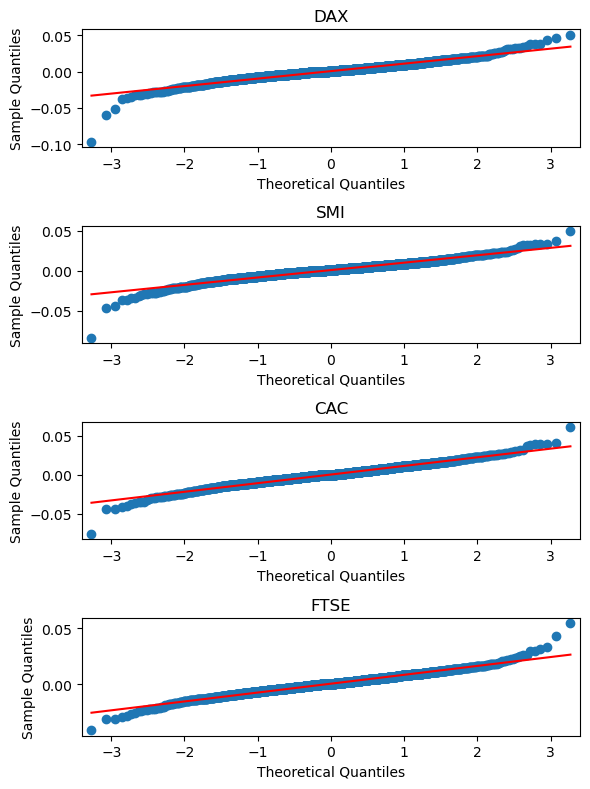

In [39]:
fig, axs = plt.subplots(4, figsize = (6, 8))

for i in range(4):
    sm.qqplot(log_r[:,i], line = 's', ax = axs[i])
    axs[i].set_title(df.columns[i])
    res = shapiro(log_r[:, i])
    p = res.pvalue
    print("{}'s p value for normal distribution is {}".format(df.columns[i], p))
plt.tight_layout()
pylab.show()

For all four indices, 

Lower Tail: The lower tail (left side) shows that the lower quantiles of the DAX data fall below the expected quantiles for a normal distribution. This means that the DAX index has more extreme negative returns than would be expected for a normal distribution.

Upper Tail: Similarly, the upper tail (right side) shows that the upper quantiles of the DAX data exceed what would be expected under normality, indicating more extreme positive returns than a normal distribution would predict.

Overall, the QQ plot suggests that the distribution of the indices is not perfectly normal, meaning it has fatter tails than a normal distribution.

Based on the Shapiro-Wilk test, the null hypothesis of normality are rejected for four time series.

In [30]:
from scipy.stats import t, probplot

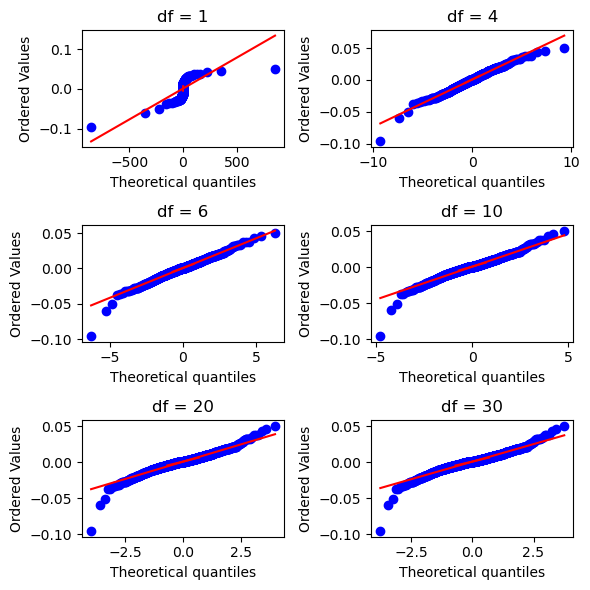

In [48]:
n = len(log_r[:, 1])
q_grid = [i / (n+1) for i in range(1, n+1)]
df_grid = [1, 4, 6, 10, 20, 30]
idx_names = df.columns

fig, axs = plt.subplots(3, 2, figsize = (6, 6))
for i, dgf in enumerate(df_grid):
    idx_r = i // 2
    idx_c = i % 2
    probplot(log_r[:, 0], dist = 't', sparams = (dgf,), plot=axs[idx_r, idx_c])
    axs[idx_r, idx_c].set_title('df = {}'.format(dgf))
    q25, q75 = np.percentile(log_r[:, 0], [25, 75])
    t25, t75 = t.ppf([0.25, 0.75], dgf)
    slope, intercept = np.polyfit([t25, t75], [q25, q75], 1)
    axs[idx_r, idx_c].plot(np.array([t25, t75]), slope * np.array([t25, t75]) + intercept, 'r')
plt.tight_layout()
plt.show()

dt = 20 and dt = 30 both fit the data to t-distribution, because the data aligns with the red line better.

In [50]:
from scipy.stats import norm, median_abs_deviation
from scipy.stats import gaussian_kde

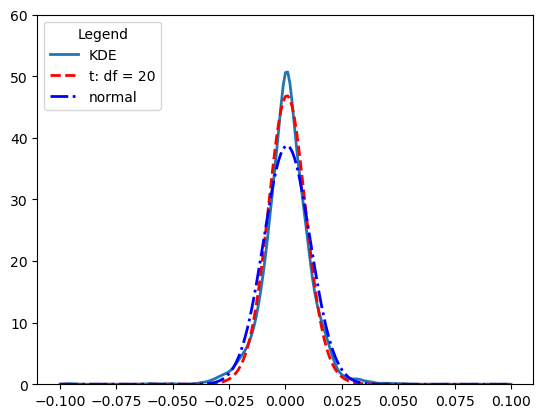

In [65]:
x = np.arange(-0.1, 0.1+0.001/2, 0.001)
df = 20

mad_t = median_abs_deviation(log_r[:, 0]) * np.sqrt(df/ (df - 2)) / t.ppf(0.75, df)

kde = gaussian_kde(log_r[:, 0])
kde_values = kde(x)

t_values = t.pdf(x, df, loc = np.mean(log_r[:, 0]), scale = mad_t)
normal_values = norm.pdf(x, loc = np.mean(log_r[:, 0]), scale = np.std(log_r[:, 0]))


plt.plot(x, kde_values, lw=2, label='KDE')
plt.plot(x, t_values, 'r--', lw=2, label=f't: df = {df}')
plt.plot(x, normal_values, 'b-.', lw=2, label = 'normal')
plt.ylim(0, 60)
plt.legend(title='Legend', loc='upper left')
plt.show()

We choose df = 20, so the t distribution agrees closely with the kernel density estimate. The t distribution provides a better fit than normal distribution.

In [66]:
import yfinance as yf

In [68]:
mcd = yf.download('MCD', start = '2010-01-04', end = '2014-09-05')
adjPrice = mcd['Adj Close']

[*********************100%%**********************]  1 of 1 completed


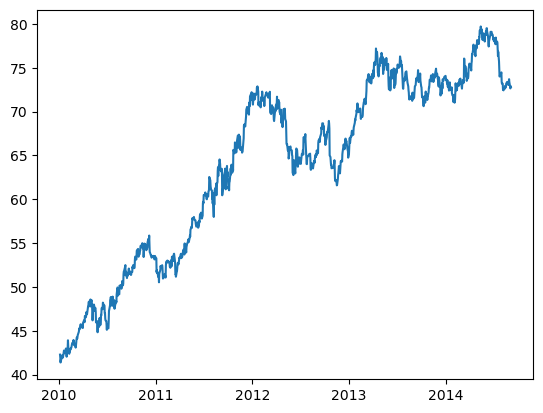

In [69]:
plt.plot(adjPrice)
plt.show()

The price series are not stationary at all. We turn the serie into log return.

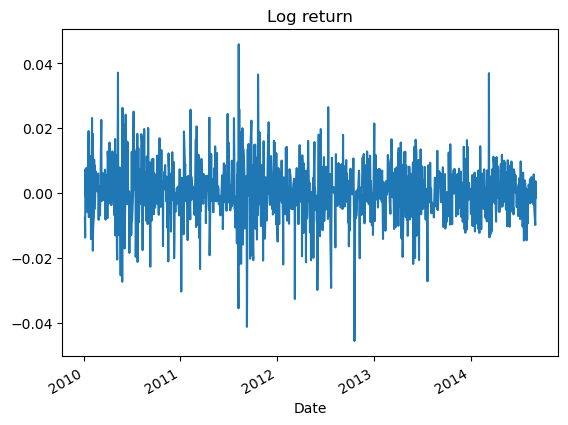

In [78]:
LogRet = (np.log(adjPrice) - np.log(adjPrice.shift())).dropna()
LogRet.plot(title = 'Log return')
plt.show()

Log return time series look more stationary than the price series, but we can't conclude if we have not done any test. 

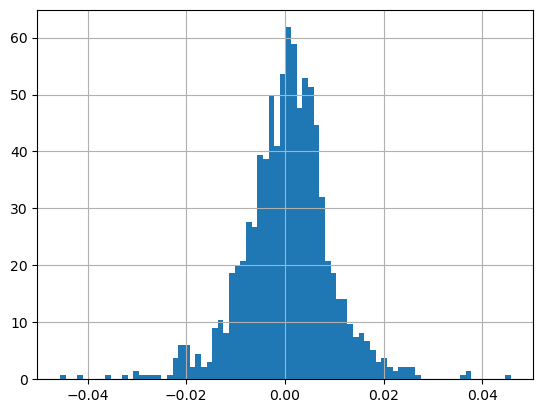

In [85]:
LogRet.hist(bins = 80, density = True)
plt.show()

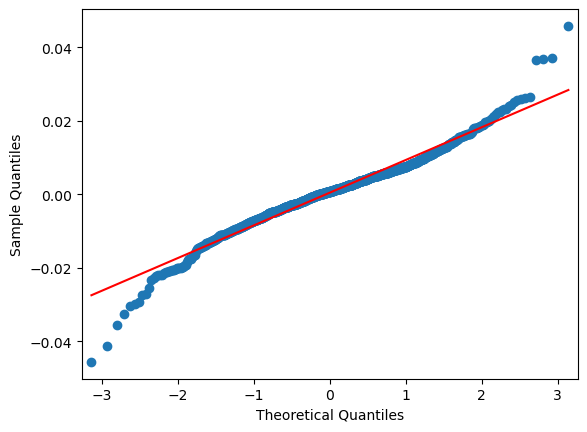

In [87]:
sm.qqplot(LogRet, line = 's')
plt.show()

## Conclusion on MCD return data

Based on the visual analysis of the histogram and the QQ plot, the log returns of the financial time series do not seem to perfectly align with a normal distribution. The histogram displays a pronounced central peak and exhibits potential signs of leptokurtosis, suggesting a higher frequency of outcomes close to the mean compared to a normal distribution, along with possibly greater kurtosis indicated by the heavier tails. This is corroborated by the QQ plot, where the log returns display curvature away from the reference line, particularly in the tails. Such behavior indicates that extreme values are more common than what would be expected under a normal distribution, implying a presence of heavy tails. The QQ plot does not clearly indicate a pronounced asymmetry, suggesting that the returns might be relatively symmetric, although further statistical tests would be necessary to confirm this. In summary, the log returns exhibit features characteristic of financial time series data, including heavy tails and a peaked distribution, which could have implications for financial risk management and require careful consideration in investment strategies.